In [44]:
import numpy as np
import scipy
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt
from scipy.io import wavfile

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# This is the real LIGO data 

We got these plots below from LIGO github, then converted it to sound to compare with the model we simulated. 

https://github.com/losc-tutorial/Data_Guide/blob/master/Guide_Notebook.ipynb

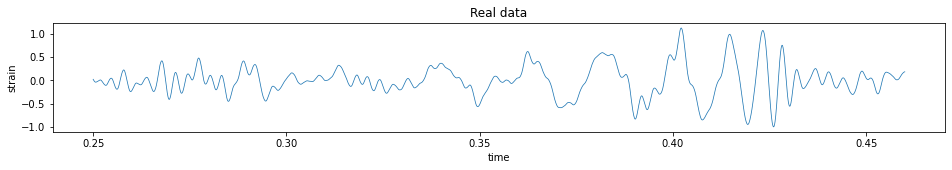

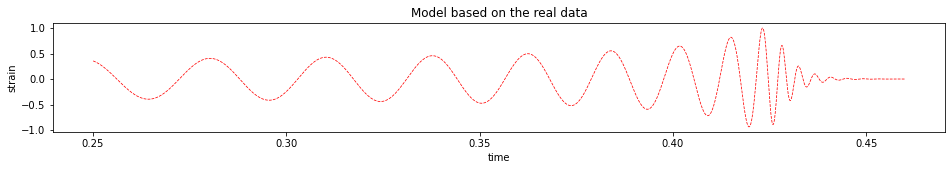

Text(0, 0.5, 'strain')

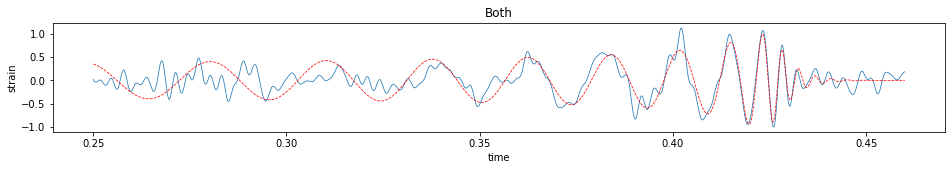

In [45]:
fig_template2 = np.genfromtxt('fig1-observed-H.txt')

#%matplotlib notebook
plt.figure(figsize = (16,2))
plt.title("Real data")
fig_template_x2 = fig_template2[:, 0]
fig_template_y2 = fig_template2[:, 1]
#plt.plot(fig_template_x2, fig_template_y2)
plt.plot(fig_template_x2, fig_template_y2)
plt.xlabel("time")
plt.ylabel("strain")


plt.figure(figsize = (16,2))
plt.title("Model based on the real data")
plt.plot(fig_template_x, fig_template_y, 'r--')
plt.xlabel("time")
plt.ylabel("strain")

plt.show()

fig_template2 = np.genfromtxt('fig1-observed-H.txt')

#%matplotlib notebook
plt.figure(figsize = (16,2))
plt.title("Both")
fig_template_x2 = fig_template2[:, 0]
fig_template_y2 = fig_template2[:, 1]
plt.plot(fig_template_x2, fig_template_y2)
plt.plot(fig_template_x, fig_template_y, 'r--')
plt.xlabel("time")
plt.ylabel("strain")

In [46]:
wave_real = fig_template_y2
wave_simu = fig_template_y

In [47]:
wave_real /= np.max(np.abs(wave_real))
    
wave_int_real = np.int16(wave_real * 32767)

wavfile.write('output_real.wav', 2000, wave_int_real)

wave_simu /= np.max(np.abs(wave_simu))
    
wave_int_simu = np.int16(wave_simu * 32767)

wavfile.write('output_simu.wav', 1000, wave_int_simu)

# Below we made a model based on some equations from p-set #4 and "Gravitational Waves and LIGO" slide show 

https://labcit.ligo.caltech.edu/~ajw/ligo_CERN_040714.pdf

# $f(t) = \frac{\sqrt{GM}}{2 \pi a_0^{3/2}} \left(1 - \frac{t}{t_0}\right)^{-\frac{3}{8}}$


This is the frequency as a function of time

# $h(t) = 4 \pi^2 \frac{G M a_0^2}{c^4 r} \cdot {f}(t)^2$


This is amplitude as a function of frequency. 

# $GW = h(t) \cdot \sin(2 \pi f(t) t)$

This is our simulated gravitatinal wave

In [51]:
c = 3e10
G = 6.67e-8 
a_0 = 3.5e7
m_1 = 5.967e34
m_2 = 6.961e34
M = m_1 + m_2
t_0 = 1.0e6     
r = 1.0e24     
x = np.sqrt(G*M)


def get_f(t):
    return (x / (2 * np.pi * a_0**(3/2))) * ((1 - t/t_0)**(-3/8))

def get_h(t):
    return (4*np.pi**2) * ((G*M*a_0**2)/(c**4 *r)) * get_f(t)**2


t_values = np.linspace(0, t_0, 1000)


waves = [get_h(t) * np.sin(2*np.pi*get_f(t)*t) for t in t_values]

/var/folders/4h/yr3nlrsx1fzdz9cg125m_tgw0000gn/T/ipykernel_13531/3214684423.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  return (x / (2 * np.pi * a_0**(3/2))) * ((1 - t/t_0)**(-3/8))
/var/folders/4h/yr3nlrsx1fzdz9cg125m_tgw0000gn/T/ipykernel_13531/3214684423.py:22: RuntimeWarning: invalid value encountered in sin
  waves = [get_h(t) * np.sin(2*np.pi*get_f(t)*t) for t in t_values]


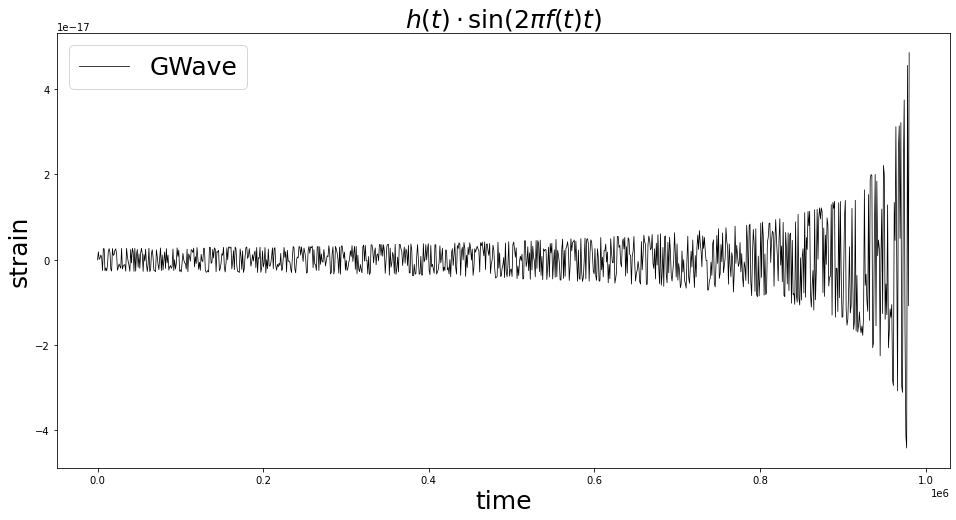

In [58]:
plt.figure(figsize = (16,8))
plt.plot(t_values[0:980],waves[0:980], color = 'black', label = 'GWave')
plt.legend( fontsize = 25)
plt.title("$h(t) \cdot \sin(2 \pi f(t) t)$", fontsize = 25)
plt.xlabel("time", fontsize = 25)
plt.ylabel("strain", fontsize = 25)
plt.show()

In [59]:
waves /= np.max(np.abs(waves[0:990]))
    
wave_int = np.int16(waves * 32767)

wavfile.write('output2.wav', 2000, wave_int)